In [1]:
%run GroundTruthGenerator.py

## Main Running Section

## Debugging/Test Cases

In [2]:
# Cell 2: Setup test data directory and create dummy images for testing ImageLoader

import os
import cv2
import numpy as np

# Create a test data directory if it doesn't exist
test_data_dir = "test_data"
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)

# Create dummy images (simple colored images)
dummy_rgb = np.zeros((100, 100, 3), dtype=np.uint8)
dummy_rgb[:] = [255, 0, 0]  # Red image for RGB
dummy_thermal = np.zeros((100, 100, 3), dtype=np.uint8)
dummy_thermal[:] = [0, 255, 0]  # Green image for Thermal

# Save dummy images using the expected naming convention: pair_test_rgb.jpg and pair_test_thermal.jpg
cv2.imwrite(os.path.join(test_data_dir, "pair_test_rgb.jpg"), cv2.cvtColor(dummy_rgb, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(test_data_dir, "pair_test_thermal.jpg"), cv2.cvtColor(dummy_thermal, cv2.COLOR_RGB2BGR))

print("Dummy images created in the 'test_data' directory.")


Dummy images created in the 'test_data' directory.


In [3]:
# Cell 3: Test the ImageLoader class with the dummy images

# Instantiate ImageLoader with test data directory (enable debug)
img_loader = ImageLoader(test_data_dir, debug=True)
# Load the image pair for the id "pair_test"
rgb_img, thermal_img = img_loader.load_image_pair("pair_test", debug=True)
print("Loaded image shapes:", rgb_img.shape, thermal_img.shape)


[DEBUG] ImageLoader initialized with directory: test_data
[DEBUG] Loading RGB image from: test_data/pair_test_rgb.jpg
[DEBUG] Loading Thermal image from: test_data/pair_test_thermal.jpg
[DEBUG] Loaded images shapes: RGB (100, 100, 3), Thermal (100, 100, 3)
Loaded image shapes: (100, 100, 3) (100, 100, 3)


In [4]:
# Cell 4: Test the SuperPointExtractor class using the dummy RGB image

# Instantiate SuperPointExtractor (using ORB as a placeholder)
sp_extractor = SuperPointExtractor(debug=True)
keypoints, descriptors = sp_extractor.extract_keypoints(rgb_img, debug=True)
print(f"Extracted {len(keypoints)} keypoints from the dummy RGB image.")


[DEBUG] SuperPointExtractor (using ORB) initialized.
[DEBUG] Extracting keypoints and descriptors.
[DEBUG] Extracted 0 keypoints.
Extracted 0 keypoints from the dummy RGB image.


In [5]:
# Cell 5: Test the SuperGlueMatcher by matching keypoints between the same dummy image

# Extract keypoints for both sides using the same image (for simplicity)
keypoints1, descriptors1 = sp_extractor.extract_keypoints(rgb_img, debug=True)
keypoints2, descriptors2 = sp_extractor.extract_keypoints(rgb_img, debug=True)

# Instantiate SuperGlueMatcher and match keypoints (using BFMatcher)
sg_matcher = SuperGlueMatcher(debug=True)
matches = sg_matcher.match_keypoints((keypoints1, descriptors1), (keypoints2, descriptors2), debug=True)
print(f"Found {len(matches)} matches between the same image.")


[DEBUG] Extracting keypoints and descriptors.
[DEBUG] Extracted 0 keypoints.
[DEBUG] Extracting keypoints and descriptors.
[DEBUG] Extracted 0 keypoints.
[DEBUG] SuperGlueMatcher (using BFMatcher) initialized.
[DEBUG] Matching keypoints using BFMatcher.
[DEBUG] Found 0 matches.
Found 0 matches between the same image.


[DEBUG] MatchVisualizer initialized with 2 matches.
[DEBUG] Preparing to display matches interactively.
[DEBUG] Displaying figure with match lines. Click near a line to toggle selection.


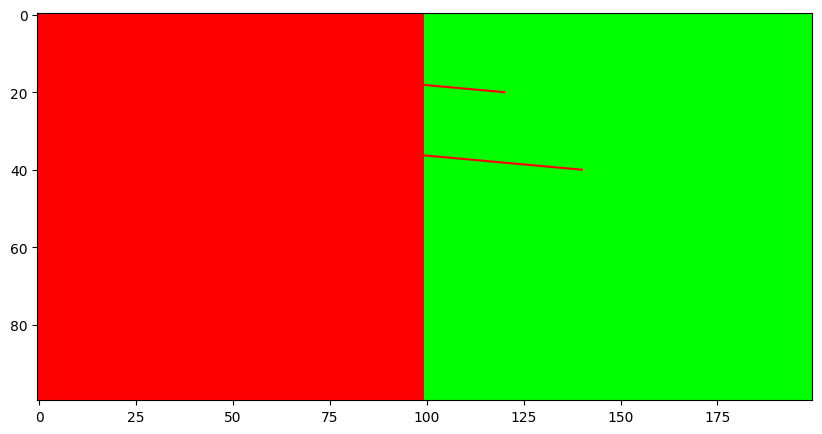

Interactively test the visualizer: Click near match lines to toggle selection.


In [6]:
# Cell 6: Test the MatchVisualizer interactively

# If no valid matches were found, create dummy matches for demonstration.
if not matches or matches == "matches":
    matches = [((10, 10), (20, 20)), ((30, 30), (40, 40))]

# Instantiate the MatchVisualizer with the dummy images and matches
visualizer = MatchVisualizer(rgb_img, thermal_img, matches, debug=True)
visualizer.display_matches(debug=True)
print("Interactively test the visualizer: Click near match lines to toggle selection.")
# After interacting, you can run:
# selected = visualizer.get_selected_matches(debug=True)
# print("Selected matches:", selected)


In [7]:
# Cell 7: Test the GroundTruthFileWriter by writing dummy selected matches

# Create a test output directory if it doesn't exist
test_output_dir = "test_output"
if not os.path.exists(test_output_dir):
    os.makedirs(test_output_dir)

# Instantiate the GroundTruthFileWriter
gt_writer = GroundTruthFileWriter(test_output_dir, debug=True)
# Create dummy selected matches for testing
dummy_selected_matches = [((10, 10), (20, 20)), ((30, 30), (40, 40))]
gt_writer.write_ground_truth_file("pair_test", dummy_selected_matches, debug=True)

# Verify the written file by reading and printing its contents
output_file = os.path.join(test_output_dir, "pair_test_ground_truth.txt")
with open(output_file, 'r') as f:
    content = f.read()
print("Contents of the ground truth file:\n", content)


[DEBUG] GroundTruthFileWriter initialized with backend directory: test_output
[DEBUG] Writing ground truth file to: test_output/pair_test_ground_truth.txt
[DEBUG] Wrote match: 10.00 10.00 20.00 20.00
[DEBUG] Wrote match: 30.00 30.00 40.00 40.00
[DEBUG] Ground truth file writing complete.
Contents of the ground truth file:
 10.00 10.00 20.00 20.00
30.00 30.00 40.00 40.00



[DEBUG] Initializing GroundTruthGenerator with data_dir: test_data and backend_dir: test_output
[DEBUG] Starting main processing loop...
[DEBUG] Processing next image pair: pair_test
[DEBUG] Starting processing for image pair: pair_test
[DEBUG] Loaded images for pair pair_test: RGB image: [[[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 ...

 [[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[254   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]], Thermal image: [[[  0 255   1]
  [  0 255   1]
  [  0 255   1]
  ...
  [  0 255

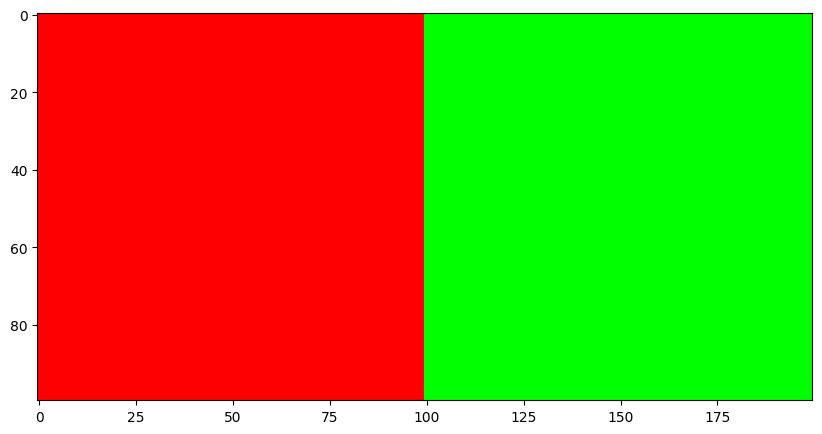

[DEBUG] Displayed matches. Awaiting user confirmation for match selection...
[DEBUG] User selected matches: []
[DEBUG] Ground truth file written for pair: pair_test
[DEBUG] Displayed confirmation to user for pair: pair_test
[DEBUG] Completed processing all image pairs.


In [8]:
# Cell 8: Test the full GroundTruthGenerator workflow

# Instantiate GroundTruthGenerator with the test data and output directories
gt_generator = GroundTruthGenerator(test_data_dir, test_output_dir, debug=True)

# For testing purposes, override get_all_pair_ids to only return our dummy pair "pair_test"
gt_generator.get_all_pair_ids = lambda debug=False: ["pair_test"]

# Run the generator workflow.
# Note: This cell will wait for interactive input (e.g., "Press Enter..." prompts).
gt_generator.run(debug=True)
